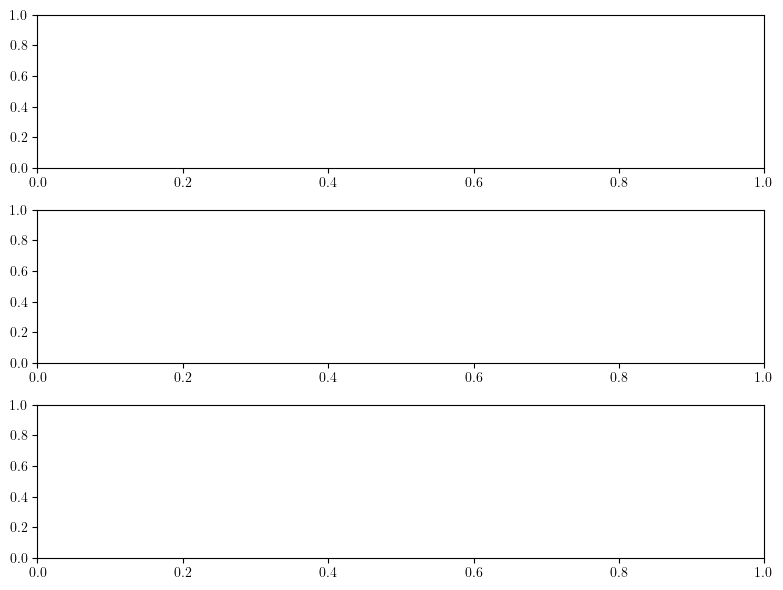

In [2]:
import matplotlib.pyplot as plt
import colorsys
import matplotlib.colors as mcolors
import numpy as np

plt.rcParams['text.usetex'] = True
f = 28

def hex_to_rgb_array(hex_colors):
    """Convert a list of hex colors to an (N, 1, 3) RGB array for imshow."""
    return np.array([mcolors.hex2color(c) for c in hex_colors]).reshape(1, len(hex_colors), 3)

def analogous_palette(base_hex, n=5, hue_shift=30):
    """Generate an analogous color palette by shifting the hue."""
    base_rgb = mcolors.hex2color(base_hex)
    base_hsl = colorsys.rgb_to_hls(*base_rgb)

    colors = []
    step = hue_shift / 360  
    start_shift = -((n - 1) // 2) * step  

    for i in range(n):
        new_hue = (base_hsl[0] + start_shift + i * step) % 1.0  
        new_rgb = colorsys.hls_to_rgb(new_hue, base_hsl[1], base_hsl[2])  
        colors.append(mcolors.to_hex(new_rgb))  

    return colors

def monochromatic_palette(base_hex, n=5, sat_range=(0.3, 1.0), light_range=(0.3, 0.9)):
    """Generate a monochromatic color palette by varying saturation and lightness."""
    base_rgb = mcolors.hex2color(base_hex)
    base_hsl = colorsys.rgb_to_hls(*base_rgb)

    colors = []
    sat_values = np.linspace(sat_range[0], sat_range[1], n)
    light_values = np.linspace(light_range[0], light_range[1], n)

    for s, l in zip(sat_values, light_values):
        new_rgb = colorsys.hls_to_rgb(base_hsl[0], l, s)
        colors.append(mcolors.to_hex(new_rgb))

    return colors

def tints_palette(base_hex, n=5, tint_range=(0.0, 1.0)):
    """Generate a tints palette by mixing the base color with white."""
    base_rgb = mcolors.hex2color(base_hex)
    base_hsl = colorsys.rgb_to_hls(*base_rgb)

    colors = []
    light_values = np.linspace(base_hsl[1], 1.0, n)  # Lightness increases towards 1 (white)

    for l in light_values:
        new_rgb = colorsys.hls_to_rgb(base_hsl[0], l, base_hsl[2])
        colors.append(mcolors.to_hex(new_rgb))

    return colors

def plot_palettes(base_color, n=5, m=100):
    """Plot both Analogous, Monochromatic, and Tints palettes."""
    analogous_colors = analogous_palette(base_color, n)
    monochromatic_colors = monochromatic_palette(base_color, m)
    tints_colors = tints_palette(base_color, m)

    fig, axs = plt.subplots(3, 1, figsize=(8, 6))

    # Convert hex colors to RGB arrays
    analogous_rgb = hex_to_rgb_array(analogous_colors)
    monochromatic_rgb = hex_to_rgb_array(monochromatic_colors)
    tints_rgb = hex_to_rgb_array(tints_colors)

    # # Analogous Palette
    # axs[0].imshow(analogous_rgb, extent=[0, n, 0, 1], aspect="auto")
    # axs[0].set_xticks(range(n))
    # axs[0].set_xticklabels(analogous_colors, rotation=45, ha="right")
    # axs[0].set_yticks([])
    # axs[0].set_title("Analogous Palette")

    # # Monochromatic Palette
    # axs[1].imshow(monochromatic_rgb, extent=[0, m, 0, 1], aspect="auto")
    # axs[1].set_xticks(range(m))
    # axs[1].set_xticklabels(monochromatic_colors, rotation=45, ha="right")
    # axs[1].set_yticks([])
    # axs[1].set_title("Monochromatic Palette")

    # # Tints Palette
    # axs[2].imshow(tints_rgb, extent=[0, m, 0, 1], aspect="auto")
    # axs[2].set_xticks(range(m))
    # axs[2].set_xticklabels(tints_colors, rotation=45, ha="right")
    # axs[2].set_yticks([])
    # axs[2].set_title("Tints Palette")

    plt.tight_layout()
    plt.show()

    return monochromatic_rgb, analogous_rgb, tints_rgb

# Example Usage
base_color = "#0181C3"
mono, ana, tints = plot_palettes(base_color, n=12, m=100)

green = ana[:, 2]
red = ana[:, -1]
blue = ana[:, 5]
purple = ana[:, 8]

# # Example Usage
# base_color = "#C34301"
# plot_palettes(base_color, n=int(360/30))

# # Example Usage
# base_color = "#C30181"
# plot_palettes(base_color, n=int(360/30))

# # Example Usage
# base_color = "#20C301"
# plot_palettes(base_color, n=int(360/30))

In [3]:
mono.reverse()

AttributeError: 'numpy.ndarray' object has no attribute 'reverse'

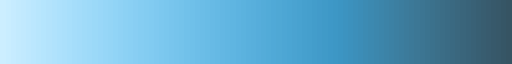

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Convert the monochromatic palette from hex to RGB tuples
tints_rgb = [mcolors.hex2color(color) for color in tints[0]]
mono_rgb = [mcolors.hex2color(color) for color in mono[0]]

# Create a colormap using the monochromatic palette
from matplotlib.colors import ListedColormap

def create_colormap(rgb_colors, name="custom_cmap"):
    """Generate a colormap from a list of RGB colors."""
    return ListedColormap(rgb_colors, name=name)

cmap = create_colormap(mono_rgb[::-1])
cmap

# 1. Plot clusters on dem

In [5]:
import os
import re
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# --- Load DEM Data ---
data_path = "/Users/fquareng/data/lffd20940101000000c.nc"
ds = xr.open_dataset(data_path, engine="netcdf4")
hsurf = ds.HSURF.sel(time="2095-03-20T18:00:00")

# --- Directory containing cluster folders ---
base_dir = "/Users/fquareng/data/1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_threshold_12_blurred"

# --- Extract coordinates and cluster labels ---
cluster_data = {}

for cluster_folder in sorted(os.listdir(base_dir)):  
    cluster_match = re.match(r"cluster_(\d+)", cluster_folder)
    if cluster_match:  
        cluster_label = int(cluster_match.group(1))  
        cluster_path = os.path.join(base_dir, cluster_folder)  
        cluster_data[cluster_label] = {"coords_x": [], "coords_y": []}  
        
        for filename in os.listdir(cluster_path):  
            match = re.match(r"(\d+)_(\d+)_.*\.nz", filename)  
            if match:  
                coord_x, coord_y = int(match.group(1)), int(match.group(2))  
                cluster_data[cluster_label]["coords_x"].append(coord_x)
                cluster_data[cluster_label]["coords_y"].append(coord_y)

# --- Convert indices to longitude & latitude ---
for cluster_label in cluster_data:
    cluster_data[cluster_label]["coords_x"] = [ds.rlon[64::128][x] for x in cluster_data[cluster_label]["coords_x"]]
    cluster_data[cluster_label]["coords_y"] = [ds.rlat[64::128][y] for y in cluster_data[cluster_label]["coords_y"]]


9


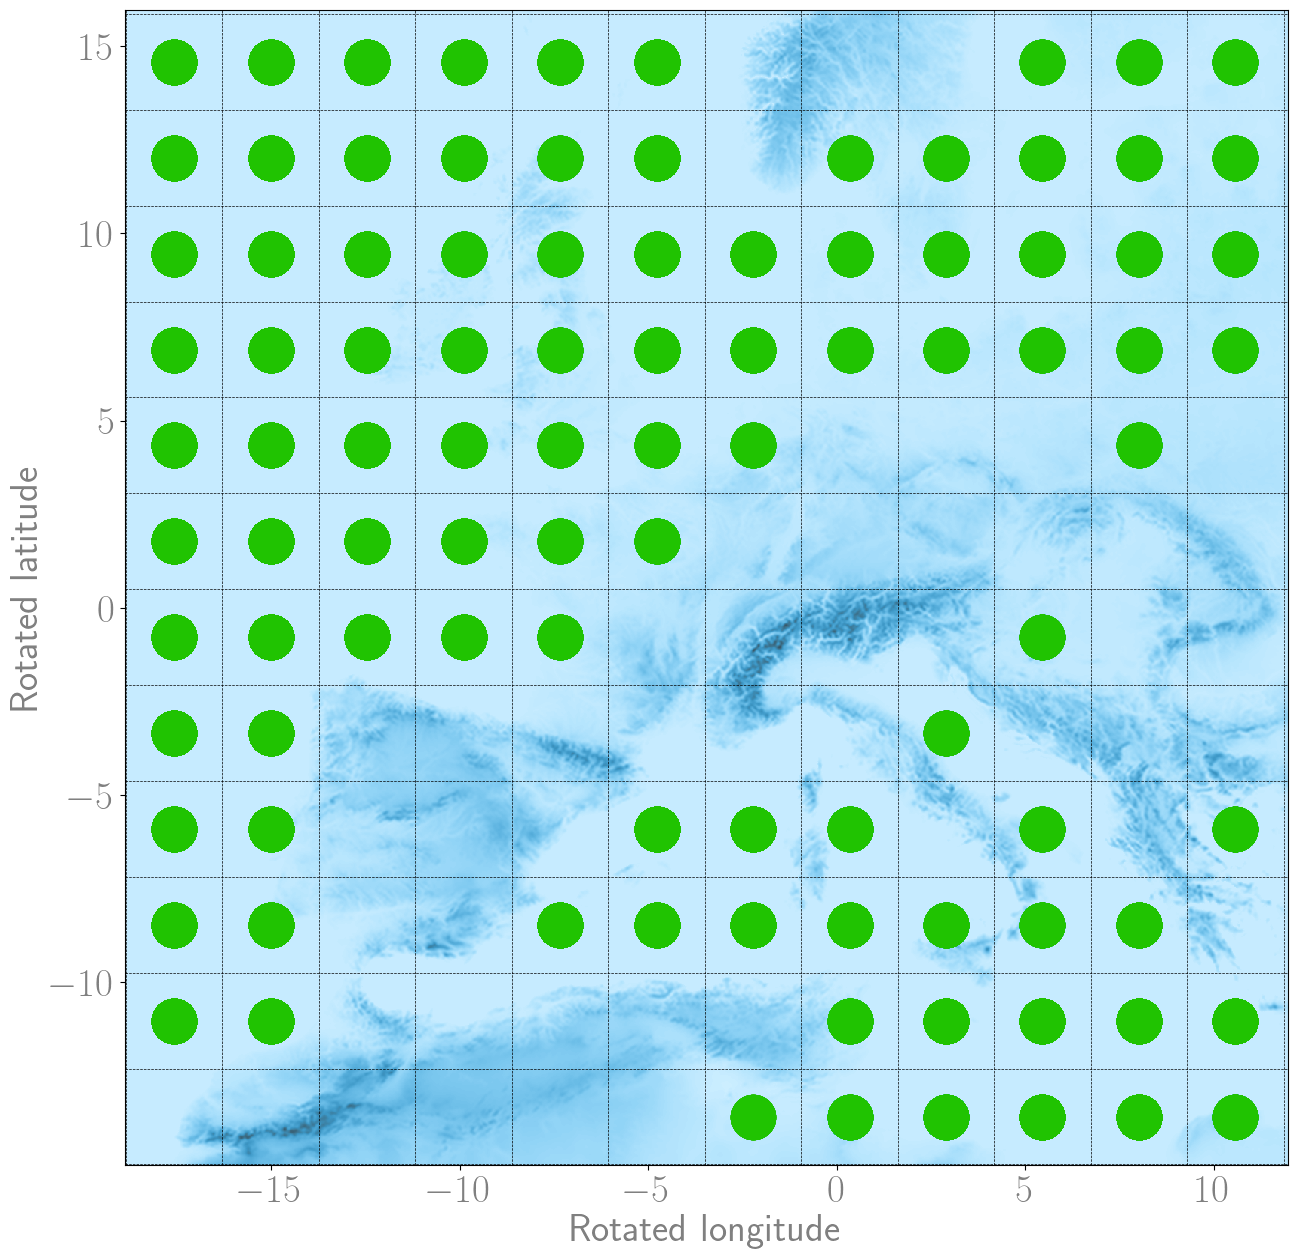

9


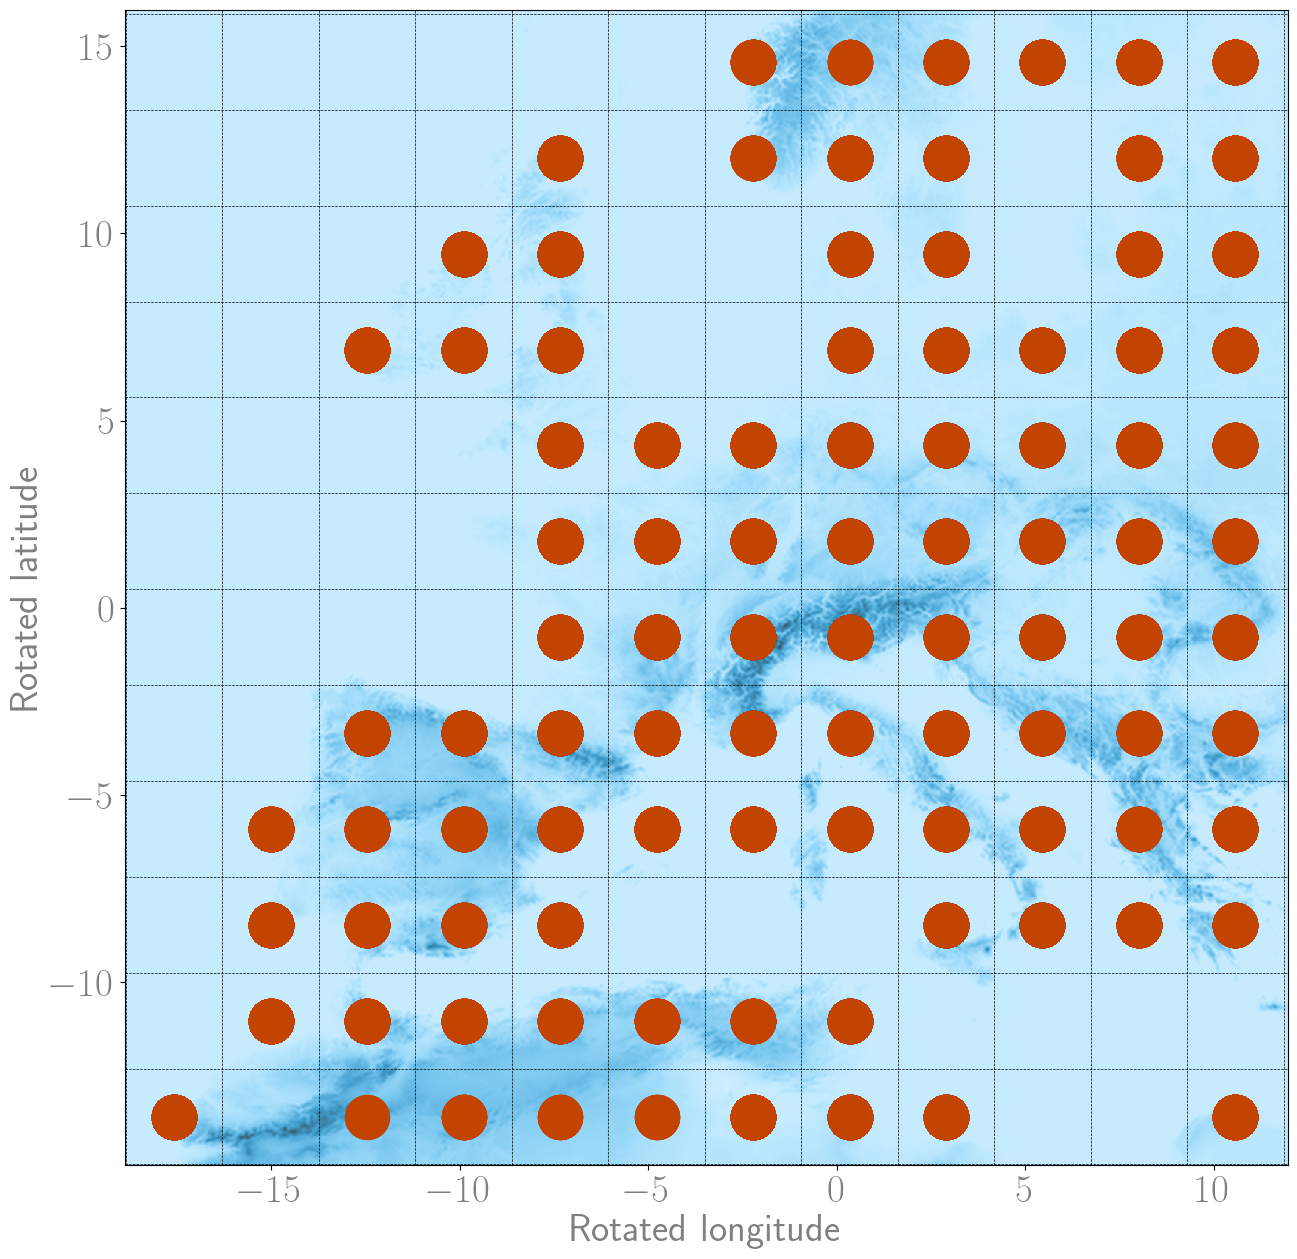

9


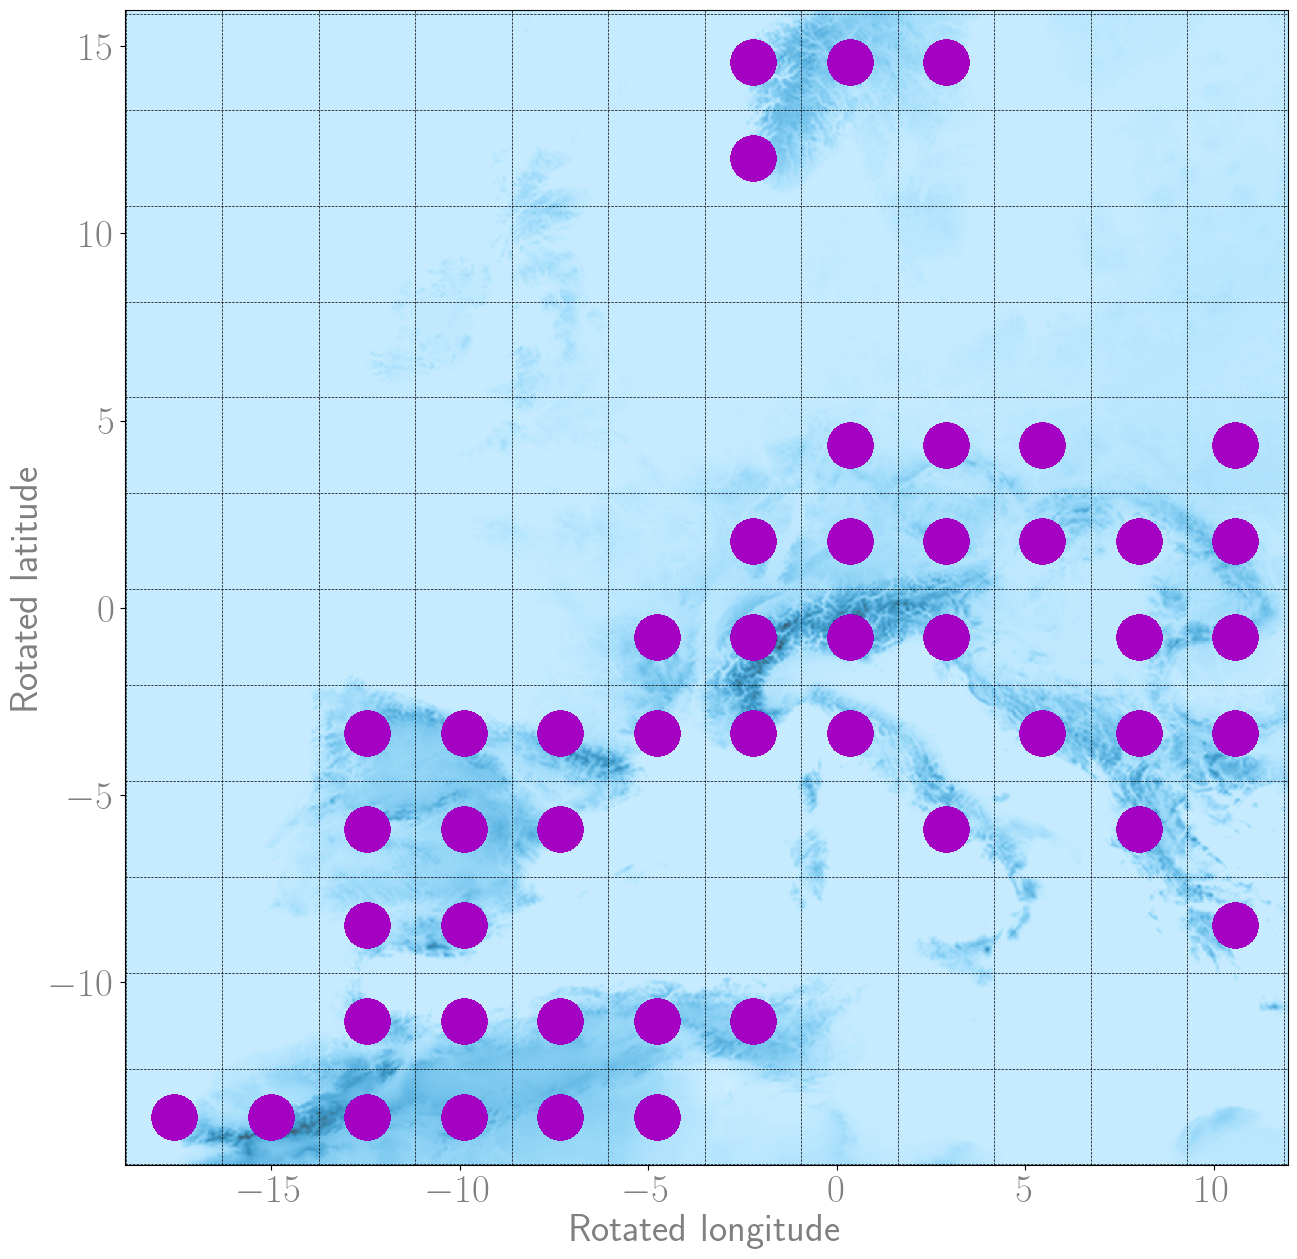

In [6]:
# --- Plotting ---
mono_rgb = [mcolors.hex2color(color) for color in mono[0]]
tints_rgb = [mcolors.hex2color(color) for color in tints[0]]
# ana_rgb = [mcolors.hex2color(color) for color in ana[0]]
# cmap = create_colormap(tints_rgb)
data_x_low = []
data_y_low = []
data_x_mid = []
data_y_mid = []
data_x_high = []
data_y_high = []
for cluster_label, data in cluster_data.items():
    if cluster_label <= 3:
        data_x_high.extend(data["coords_x"])
        data_y_high.extend(data["coords_y"])
    if 3 <= cluster_label < 7 :
        data_x_mid.extend(data["coords_x"])
        data_y_mid.extend(data["coords_y"])
    if 7 <= cluster_label:
        data_x_low.extend(data["coords_x"])
        data_y_low.extend(data["coords_y"])

for data_x, data_y, c, label in zip([data_x_low, data_x_mid, data_x_high], [data_y_low, data_y_mid, data_y_high], [green, red, purple], ["low", "mid", "high"]):
    plt.figure(figsize=(15,15))
    plt.pcolormesh(ds.rlon, ds.rlat, hsurf, cmap=cmap, shading='auto')
    plt.scatter(data_x, data_y, color=c, edgecolors=c, s=1000, marker="o")

    # Add grid lines
    for lon, lat in zip(ds.rlon[::128], ds.rlat[::128]):
        plt.axvline(x=lon, color='black', linestyle='--', linewidth=0.5)
        plt.axhline(y=lat, color='black', linestyle='--', linewidth=0.5)

    # Labels and Title
    plt.xlabel('Rotated longitude', fontsize=f, c='grey')
    plt.ylabel('Rotated latitude', fontsize=f, c='grey')
    plt.xticks(fontsize=f, c='grey')
    plt.yticks(fontsize=f, c='grey')
    # plt.title(f'Cluster {cluster_label}')

    # Save the plot
    print(cluster_label)
    # output_path = f"/Users/fquareng/phd/AdaptationSandbox/figures/poster/cluster_{label}_on_dem.png"
    # os.makedirs(os.path.dirname(output_path), exist_ok=True)
    # plt.tight_layout()
    # plt.savefig(output_path, dpi=1000)
    plt.show()

In [7]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import cartopy.feature as cfeature


# Define the rotated pole projection using Cartopy
grid_north_pole_latitude = 43.0  # from your NetCDF metadata
grid_north_pole_longitude = -170.0  # from your NetCDF metadata

projection = ccrs.RotatedPole(pole_latitude=grid_north_pole_latitude, pole_longitude=grid_north_pole_longitude)

# --- Plotting ---
mono_rgb = [mcolors.hex2color(color) for color in mono[0]]
tints_rgb = [mcolors.hex2color(color) for color in tints[0]]
# cmap = create_colormap(tints_rgb)

# Prepare your data for plotting (just the cluster handling part remains the same)
data_x_low = []
data_y_low = []
data_x_mid = []
data_y_mid = []
data_x_high = []
data_y_high = []
for cluster_label, data in cluster_data.items():
    if cluster_label <= 3:
        data_x_high.extend(data["coords_x"])
        data_y_high.extend(data["coords_y"])
    if 3 <= cluster_label < 7:
        data_x_mid.extend(data["coords_x"])
        data_y_mid.extend(data["coords_y"])
    if 7 <= cluster_label:
        data_x_low.extend(data["coords_x"])
        data_y_low.extend(data["coords_y"])

# If the `xarray.DataArray` is used for the coords, convert to numpy arrays
data_x_low = np.array(data_x_low) if isinstance(data_x_low, np.ndarray) else np.array(data_x_low).astype(float)
data_y_low = np.array(data_y_low) if isinstance(data_y_low, np.ndarray) else np.array(data_y_low).astype(float)
# Create (x, y) pairs for the "low" cluster
data_low = [(x, y) for x, y in zip(data_x_low, data_y_low)]
# Use a set to remove duplicates and preserve order
unique_data_low = []
seen = set()
for item in data_low:
    if item not in seen:
        unique_data_low.append(item)
        seen.add(item)

# If the `xarray.DataArray` is used for the coords, convert to numpy arrays
data_x_mid = np.array(data_x_mid) if isinstance(data_x_mid, np.ndarray) else np.array(data_x_mid).astype(float)
data_y_mid = np.array(data_y_mid) if isinstance(data_y_mid, np.ndarray) else np.array(data_y_mid).astype(float)
# Create (x, y) pairs for the "mid" cluster
data_mid = [(x, y) for x, y in zip(data_x_mid, data_y_mid)]
# Use a set to remove duplicates and preserve order
unique_data_mid = []
seen = set()
for item in data_mid:
    if item not in seen:
        unique_data_mid.append(item)
        seen.add(item)

# If the `xarray.DataArray` is used for the coords, convert to numpy arrays
data_x_high = np.array(data_x_high) if isinstance(data_x_high, np.ndarray) else np.array(data_x_high).astype(float)
data_y_high = np.array(data_y_high) if isinstance(data_y_high, np.ndarray) else np.array(data_y_high).astype(float)
# Create (x, y) pairs for the "high" cluster
data_high = [(x, y) for x, y in zip(data_x_high, data_y_high)]
# Use a set to remove duplicates and preserve order
unique_data_high = []
seen = set()
for item in data_high:
    if item not in seen:
        unique_data_high.append(item)
        seen.add(item)

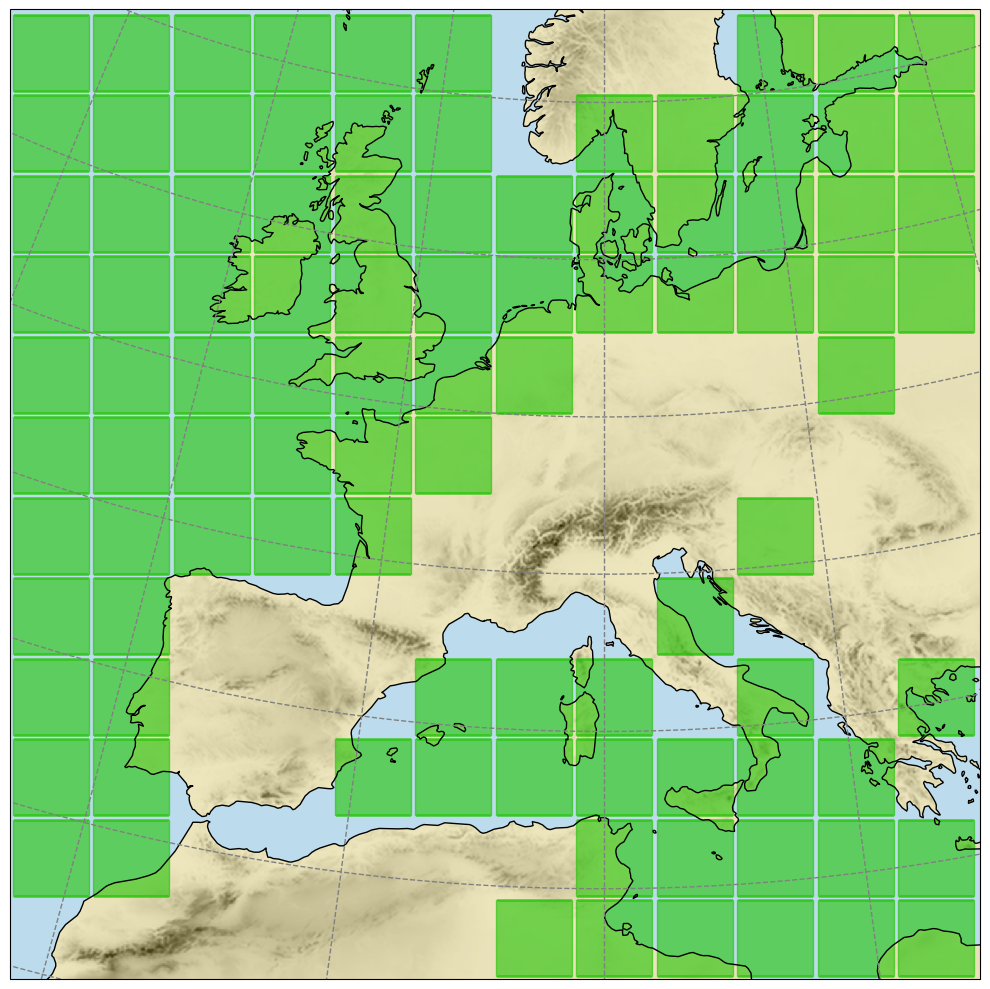

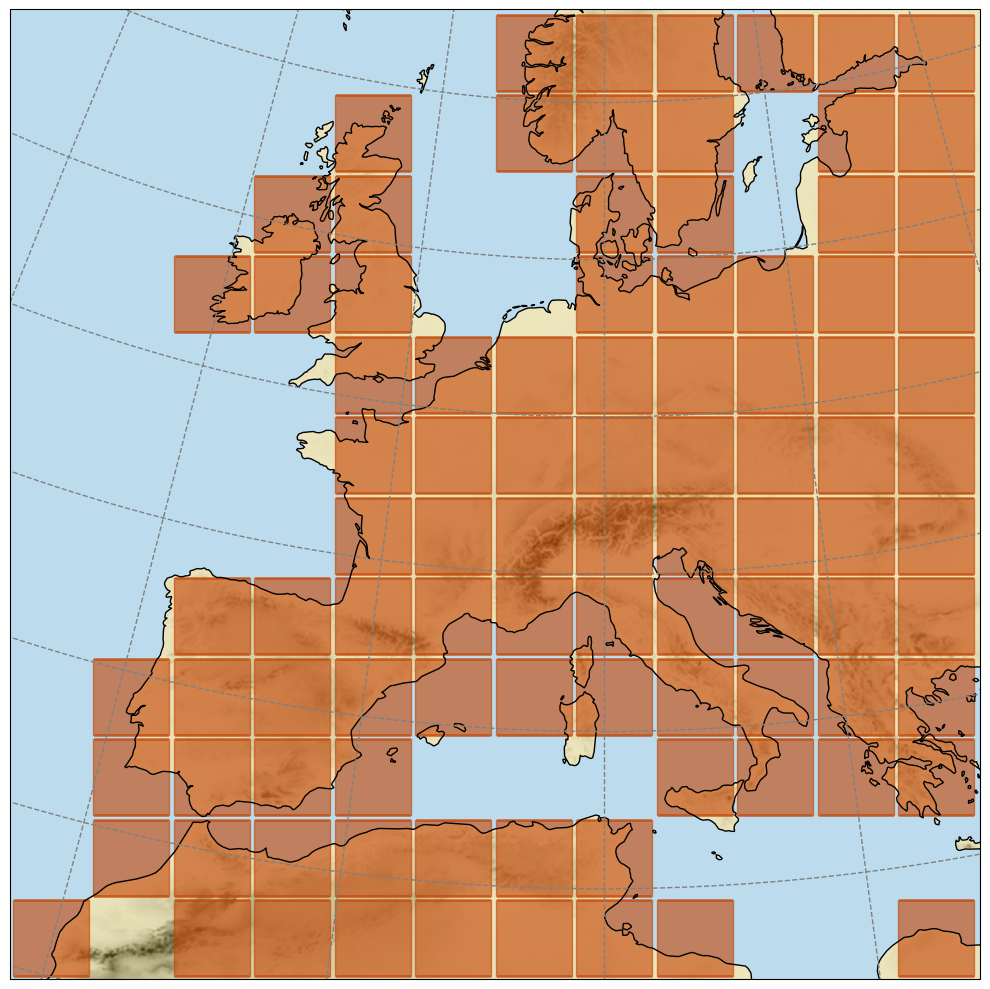

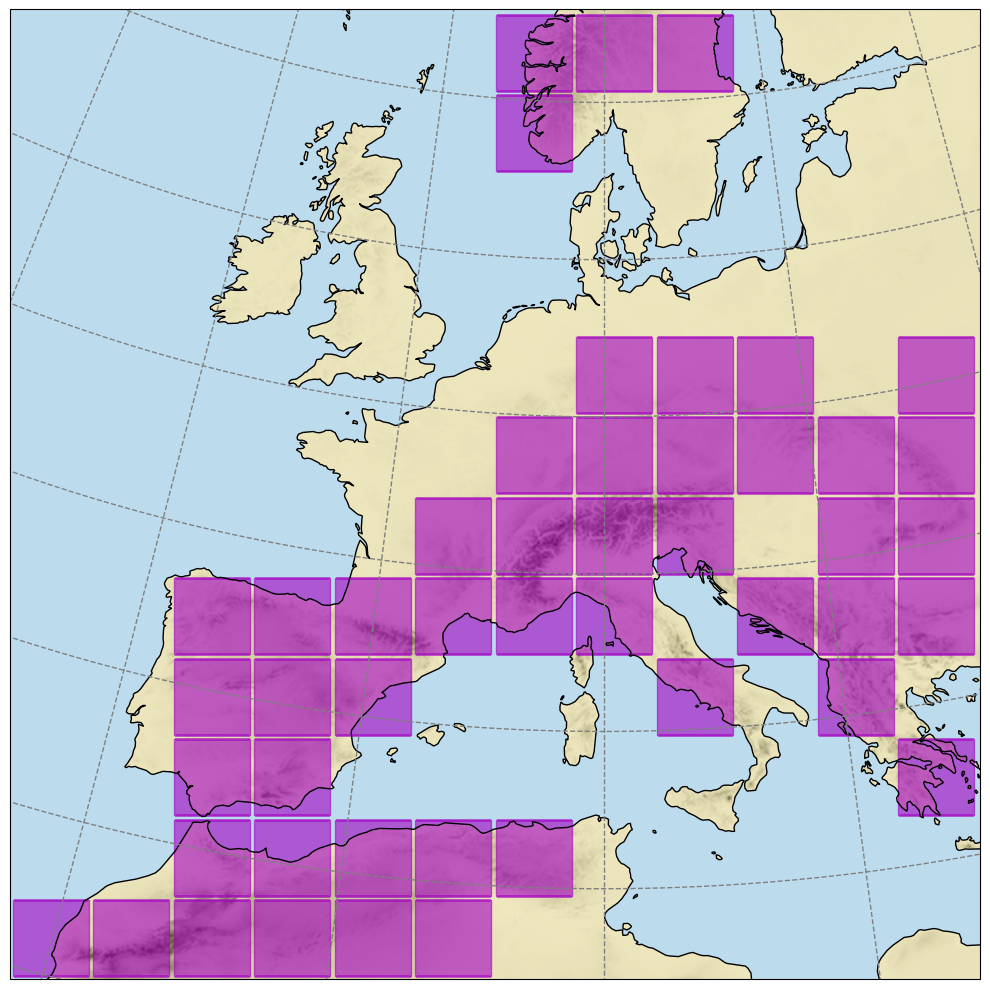

In [8]:
# Now, let's generate the plot with the rotated pole projection

yellow = "#C3A403"

for data, c, label in zip([np.array(unique_data_low), np.array(unique_data_mid), np.array(unique_data_high)], [green, red, purple], ["low", "mid", "high"]):

    
    plt.figure(figsize=(10, 10))

    # Create a new axes object with the rotated pole projection
    ax = plt.axes(projection=projection)
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor=yellow)
    ax.add_feature(cfeature.OCEAN, facecolor=blue, alpha=1)
    ax.pcolormesh(ds.rlon, ds.rlat, hsurf, cmap="Greys", shading='auto', alpha=.75, transform=projection)
    ax.scatter(data[:,0], data[:,1], color=(c, .6), edgecolors=(c, .6), s=3000, marker="s", transform=projection)

    # Add rotated coastlines using Cartopy
    
    # 

    # Add country borders
    # ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')

    # Add state/province borders (if applicable)
    # ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black')

    # Add grid lines (optional)
    ax.gridlines(linewidth=1, color='grey', linestyle='--', alpha=1, draw_labels=False)
    # Add grid lines
    # for lon, lat in zip(ds.rlon[::128], ds.rlat[::128]):
    #     plt.axvline(x=lon, color='black', linestyle='-', linewidth=1)
    #     plt.axhline(y=lat, color='black', linestyle='-', linewidth=1)

    # Labels and Title
    ax.set_xlabel('Rotated longitude', fontsize=f, c='grey')
    ax.set_ylabel('Rotated latitude', fontsize=f, c='grey')
    ax.tick_params(axis='x', labelsize=f, colors='grey')

    # Optionally add a title
    # ax.set_title(f'Cluster {label} on DEM')

    # Save or show the plot
    output_path = f"/Users/fquareng/phd/AdaptationSandbox/figures/poster/cluster_{label}_on_dem.png"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.tight_layout()
    plt.savefig(output_path, dpi=500)

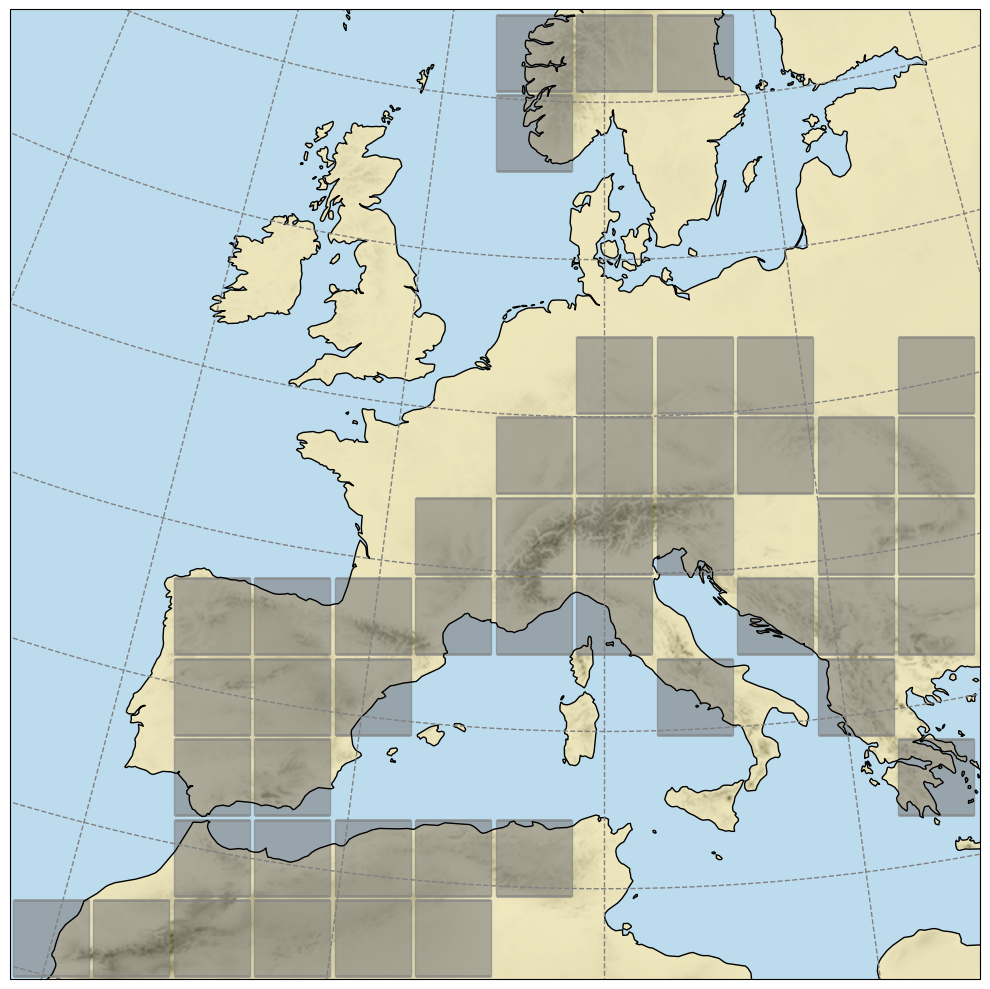

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import cartopy.feature as cfeature


# Define the rotated pole projection using Cartopy
grid_north_pole_latitude = 43.0  # from your NetCDF metadata
grid_north_pole_longitude = -170.0  # from your NetCDF metadata

projection = ccrs.RotatedPole(pole_latitude=grid_north_pole_latitude, pole_longitude=grid_north_pole_longitude)

# --- Plotting ---
mono_rgb = [mcolors.hex2color(color) for color in mono[0]]
tints_rgb = [mcolors.hex2color(color) for color in tints[0]]
# cmap = create_colormap(tints_rgb)

# Prepare your data for plotting (just the cluster handling part remains the same)
N = 2
x_cluster_N = []
y_cluster_N = []
for cluster_label, data in cluster_data.items():
    if cluster_label == N:
        x_cluster_N.extend(data["coords_x"])
        y_cluster_N.extend(data["coords_y"])

# If the `xarray.DataArray` is used for the coords, convert to numpy arrays
x_cluster_N = np.array(x_cluster_N) if isinstance(x_cluster_N, np.ndarray) else np.array(x_cluster_N).astype(float)
y_cluster_N = np.array(y_cluster_N) if isinstance(y_cluster_N, np.ndarray) else np.array(y_cluster_N).astype(float)
# Create (x, y) pairs for the "low" cluster
data_low = [(x, y) for x, y in zip(x_cluster_N, y_cluster_N)]
# Use a set to remove duplicates and preserve order
unique_data_low = []
seen = set()
for item in data_low:
    if item not in seen:
        unique_data_low.append(item)
        seen.add(item)

# Now, let's generate the plot with the rotated pole projection

yellow = "#C3A403"

for data, c, label in zip([np.array(unique_data_low)], ["grey"], ["Cluster 7"]):

    plt.figure(figsize=(10, 10))

    # Create a new axes object with the rotated pole projection
    ax = plt.axes(projection=projection)
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor=yellow)
    ax.add_feature(cfeature.OCEAN, facecolor=blue, alpha=1)
    ax.pcolormesh(ds.rlon, ds.rlat, hsurf, cmap="Greys", shading='auto', alpha=.75, transform=projection)
    ax.scatter(data[:,0], data[:,1], color=(c, .6), edgecolors=(c, .6), s=3000, marker="s", transform=projection)

    # Add rotated coastlines using Cartopy
    
    # 

    # Add country borders
    # ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')

    # Add state/province borders (if applicable)
    # ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black')

    # Add grid lines (optional)
    ax.gridlines(linewidth=1, color='grey', linestyle='--', alpha=1, draw_labels=False)
    # Add grid lines
    # for lon, lat in zip(ds.rlon[::128], ds.rlat[::128]):
    #     plt.axvline(x=lon, color='black', linestyle='-', linewidth=1)
    #     plt.axhline(y=lat, color='black', linestyle='-', linewidth=1)

    # Labels and Title
    ax.set_xlabel('Rotated longitude', fontsize=f, c='grey')
    ax.set_ylabel('Rotated latitude', fontsize=f, c='grey')
    ax.tick_params(axis='x', labelsize=f, colors='grey')

    # Optionally add a title
    # ax.set_title(f'Cluster {label} on DEM')

    # Save or show the plot
    output_path = f"/Users/fquareng/phd/AdaptationSandbox/figures/poster/cluster_{label}_on_dem.png"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.tight_layout()
    plt.savefig(output_path, dpi=500)

# 2. Box plot 

In [ ]:
import os
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
from tqdm import tqdm
import itertools
import seaborn as sns
import pandas as pd


def collect_data_for_cluster(cluster_index, cluster_dir, dem_dir):
    """Collect temperature, humidity, pressure, and elevation data for all files in a cluster's directory."""
    temperature_values = []
    humidity_values = []
    elevation_values = []
    
    # Loop through all NetCDF files in the cluster directory
    for file_name in tqdm(os.listdir(cluster_dir)):
        if file_name.endswith(".nz"):
            file_path = os.path.join(cluster_dir, file_name)
            
            # Open the NetCDF file and extract variables
            with xr.open_dataset(file_path) as ds:
                temperature = ds['T_2M'].values.mean()
                humidity = ds['RELHUM_2M'].values.mean()

                # Corresponding DEM file for elevation
                dem_file = f"{file_name.split('_')[0]}_{file_name.split('_')[1]}_dem.nc"
                dem_path = os.path.join(dem_dir, dem_file)

                # Read the DEM file to get elevation
                if os.path.exists(dem_path):
                    elevation_ds = xr.open_dataset(dem_path)
                    elevation = elevation_ds['HSURF'].values.mean()
                else:
                    elevation = None  # Skip if elevation data is missing

                if elevation is not None:
                    temperature_values.append(temperature)
                    humidity_values.append(humidity)
                    elevation_values.append(elevation)

    return cluster_index, temperature_values, humidity_values, elevation_values


def collect_data_for_all_clusters(input_dir, dem_dir, num_clusters):
    """Parallelize the collection of data for all clusters."""
    cluster_dirs = [
        (i, os.path.join(input_dir, f'cluster_{i}'), dem_dir) for i in range(num_clusters)
    ]
    
    with multiprocessing.Pool(processes=multiprocessing.cpu_count() - 1) as pool:
        results = list(tqdm(pool.starmap(collect_data_for_cluster, cluster_dirs), total=num_clusters))
    
    # Prepare the data in a dictionary format
    cluster_data = {i: {'T_2M': [], 'RELHUM_2M': [], 'HSURF': []} for i in range(num_clusters)}
    
    for cluster_index, temp_values, humidity_values, pressure_values, elevation_values in results:
        cluster_data[cluster_index]['T_2M'] = temp_values
        cluster_data[cluster_index]['RELHUM_2M'] = humidity_values
        cluster_data[cluster_index]['HSURF'] = elevation_values

    return cluster_data


def save_plot(fig, figures_dir, filename):
    os.makedirs(figures_dir, exist_ok=True)
    fig.savefig(os.path.join(figures_dir, filename), dpi=300)
    plt.close(fig)


def plot_cluster_scatter_grids(variables, cluster_data, num_clusters, variable_labels, variable_ranges, figures_directory):
    """
    Plots scatter plots for all unique combinations of the 4 variables (PS, T_2M, HSURF, RELHUM_2M).
    Each cluster gets its own subplot within a grid layout.
    
    Parameters:
        cluster_data (dict): Dictionary containing data for each cluster.
        num_clusters (int): Number of clusters.
        variable_labels (dict): Labels for variables.
        variable_ranges (dict): Axis limits for variables.
        figures_directory (str): Directory where figures should be saved.
    """
    
    variable_combinations = list(itertools.combinations(variables, 2))  # Get unique variable pairs

    for x_var, y_var in variable_combinations:
        # Determine grid layout
        cols = int(np.ceil(np.sqrt(num_clusters)))  # Number of columns
        rows = int(np.ceil(num_clusters / cols))  # Number of rows

        fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))  # Adjust figure size dynamically
        axes = axes.flatten()  # Flatten in case of multi-row layout

        for cluster in range(num_clusters):
            ax = axes[cluster]  # Get corresponding subplot
            sns.scatterplot(x=cluster_data[cluster][x_var], y=cluster_data[cluster][y_var],
                            ax=ax, alpha=0.7)
            
            ax.set_title(f"Cluster {cluster}")
            ax.set_xlabel(variable_labels[x_var])
            ax.set_ylabel(variable_labels[y_var])
            ax.set_xlim(variable_ranges[x_var])
            ax.set_ylim(variable_ranges[y_var])
            ax.grid(True)

        # Remove unused subplots if num_clusters is not a perfect square
        for i in range(num_clusters, len(axes)):
            fig.delaxes(axes[i])

        fig.suptitle(f"{variable_labels[x_var]} vs {variable_labels[y_var]} for Each Cluster", fontsize=16)
        fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title

        # Save the plot
        filename = f"{x_var.lower()}_vs_{y_var.lower()}_per_cluster.png"
        #save_plot(fig, figures_directory, filename)
        plt.show()


def plot_variable_distributions(variables, cluster_data, num_clusters, variable_labels, variable_ranges, figures_directory):
    """
    Plots the distribution of multiple variables across clusters, including mean and standard deviation.

    Parameters:
        cluster_data (dict): Dictionary containing data for each cluster.
        num_clusters (int): Number of clusters.
        all_data (dict): Dictionary containing all values for each variable.
        variable_labels (dict): Labels for variables.
        variable_ranges (dict): Axis limits for variables.
        figures_directory (str): Directory where figures should be saved.
    """

    for var in variables:
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot distribution for each cluster
        for cluster in range(num_clusters):
            sns.histplot(cluster_data[cluster][var], kde=True, label=f"Cluster {cluster}", ax=ax)

        # Set titles and labels
        ax.set_title(f"{variable_labels[var]} Distribution")
        ax.set_xlabel(variable_labels[var])
        ax.set_ylabel("Frequency")
        ax.set_xlim(variable_ranges[var])
        ax.legend(title="Cluster")

        # Save the plot
        filename = f"{var.lower()}_distribution_all_clusters.png"
        #save_plot(fig, figures_directory, filename)
        plt.show()
    

def plot_cluster_boxplots(variables, cluster_data, num_clusters, variable_labels, figures_directory):
    """
    Plots separate boxplots for each variable, grouped by cluster, using multiple y-axes (faceted subplots).
    """

    data = []
    for cluster in range(num_clusters):
        for var in variables:
            for value in cluster_data[cluster][var]:
                data.append({"Cluster": f"Cluster {cluster}", "Variable": var, "Value": value})

    df = pd.DataFrame(data)

    fig, axes = plt.subplots(len(variables), 1, figsize=(10, 6 * len(variables)), sharex=True)

    if len(variables) == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one variable

    for ax, var in zip(axes, variables):
        sns.boxplot(x="Cluster", y="Value", data=df[df["Variable"] == var], ax=ax)
        ax.set_title(f"Boxplot of {variable_labels[var]} by Cluster")
        ax.set_ylabel(variable_labels[var])
        ax.grid(True)

    axes[-1].set_xlabel("Cluster")  # Label x-axis only on the last subplot

    fig.tight_layout()
    
    filename = "boxplot_variables_per_cluster.png"
    #save_plot(fig, figures_directory, filename)
    plt.show()


def plot_cluster_boxplots(variables, cluster_data, num_clusters, variable_labels, figures_directory):
    """
    Plots separate boxplots for each variable, grouped by cluster, using multiple y-axes (faceted subplots).
    """

    data = []
    for cluster in range(num_clusters):
        for var in variables:
            for value in cluster_data[cluster][var]:
                data.append({"Cluster": f"Cluster {cluster}", "Variable": var, "Value": value})

    df = pd.DataFrame(data)

    fig, axes = plt.subplots(len(variables), 1, figsize=(10, 6 * len(variables)), sharex=True)

    if len(variables) == 1:
        axes = [axes]  # Ensure axes is iterable when there's only one variable

    # Define colors for the clusters in groups of 4
    color_palette = ["#A401C3", "#A401C3", "#A401C3", "#A401C3",  # Group 1: Cluster 0-3
                     "#20C301", "#20C301", "#20C301", "#20C301",  # Group 2: Cluster 4-7
                     "#C34301", "#C34301", "#C34301", "#C34301",  # Group 3: Cluster 8-11
                     ]  

    # Create a new column in the DataFrame to categorize clusters into groups of 4
    df['Cluster Group'] = df['Cluster'].apply(lambda x: int(x.split()[1]) // 4)  # Integer division by 4

    # Get unique cluster groups
    unique_cluster_groups = df['Cluster Group'].unique()

    for ax, var in zip(axes, variables):
        # Loop through each cluster group
        for group in unique_cluster_groups:
            group_data = df[(df["Variable"] == var) & (df["Cluster Group"] == group)]
            sns.boxplot(x="Cluster", y="Value", data=group_data, ax=ax,
                        palette=[color_palette[group]], fliersize=0, showfliers=False)
        
        ax.set_title(f"Boxplot of {variable_labels[var]} by Cluster")
        ax.set_ylabel(variable_labels[var])
        ax.grid(True)

    axes[-1].set_xlabel("Cluster")  # Label x-axis only on the last subplot

    fig.tight_layout()
    
    filename = "boxplot_variables_per_cluster.png"
    save_plot(fig, figures_directory, filename, dpi=500)
    plt.show()


# def plot_all(input_dir, dem_dir, figures_directory):
    
#     num_clusters = len([f for f in os.listdir(input_dir) if f.startswith("cluster_")])
#     print(f"Number of clusters found: {num_clusters}")
#     print("Collecting data for all clusters...")
#     cluster_data = collect_data_for_all_clusters(input_dir, dem_dir, num_clusters)

#     # Determine global min/max values
#     # all_temperatures = sum([cluster_data[c]['T_2M'] for c in range(num_clusters)], [])
#     # all_humidities = sum([cluster_data[c]['RELHUM_2M'] for c in range(num_clusters)], [])
#     # all_elevations = sum([cluster_data[c]['HSURF'] for c in range(num_clusters)], [])

#     # variable_ranges = {
#     #     "T_2M": (min(all_temperatures), max(all_temperatures)),
#     #     "RELHUM_2M": (min(all_humidities), max(all_humidities)),
#     #     "HSURF": (min(all_elevations), max(all_elevations))
#     # }

#     variable_labels = {
#         "T_2M": "Temperature (K)",
#         "RELHUM_2M": "Relative Humidity (%)",
#         "HSURF": "Elevation (m)"
#     }

#     variables = ["T_2M", "RELHUM_2M", "HSURF"]

#     # BOX PLOT =======================================================
#     plot_cluster_boxplots(variables, cluster_data, num_clusters, variable_labels, figures_directory)

#     # SCATTER PLOTS ==================================================
#     # plot_cluster_scatter_grids(variables, cluster_data, num_clusters, variable_labels, variable_ranges, figures_directory)
    
#     # VARIABLE DISTRIBUTIONS =========================================
#     # plot_variable_distributions(variables, cluster_data, num_clusters, variable_labels, variable_ranges, figures_directory)

if __name__ == "__main__":
    cluster_method = "threshold" # "threshold", "kmeans", "hierarchical"
    input_directory = f"/Users/fquareng/data/1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_{cluster_method}_12"
    # input_directory = f"/work/FAC/FGSE/IDYST/tbeucler/downscaling/fquareng/data/DA/1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_{cluster_method}_12"
    dem_directory = "/Users/fquareng/data/dem_squares"
    # dem_directory = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/fquareng/data/dem_squares"
    figures_directory = f"/Users/fquareng/phd/AdaptationSandbox/figures/new_dataset_{cluster_method}_12"
    
    print("Plotting cluster data for method:", cluster_method)
    
    num_clusters = len([f for f in os.listdir(input_directory) if f.startswith("cluster_")])
    print(f"Number of clusters found: {num_clusters}")
    print("Collecting data for all clusters...")
    cluster_data = collect_data_for_all_clusters(input_directory, dem_directory, num_clusters)

    # Determine global min/max values
    # all_temperatures = sum([cluster_data[c]['T_2M'] for c in range(num_clusters)], [])
    # all_humidities = sum([cluster_data[c]['RELHUM_2M'] for c in range(num_clusters)], [])
    # all_elevations = sum([cluster_data[c]['HSURF'] for c in range(num_clusters)], [])

    # variable_ranges = {
    #     "T_2M": (min(all_temperatures), max(all_temperatures)),
    #     "RELHUM_2M": (min(all_humidities), max(all_humidities)),
    #     "HSURF": (min(all_elevations), max(all_elevations))
    # }

    variable_labels = {
        "T_2M": "Temperature (K)",
        "RELHUM_2M": "Relative Humidity (%)",
        "HSURF": "Elevation (m)"
    }

    variables = ["T_2M", "RELHUM_2M", "HSURF"]

    # BOX PLOT =======================================================
    plot_cluster_boxplots(variables, cluster_data, num_clusters, variable_labels, figures_directory)

    # SCATTER PLOTS ==================================================
    # plot_cluster_scatter_grids(variables, cluster_data, num_clusters, variable_labels, variable_ranges, figures_directory)
    
    # VARIABLE DISTRIBUTIONS =========================================
    # plot_variable_distributions(variables, cluster_data, num_clusters, variable_labels, variable_ranges, figures_directory)

In [ ]:
cluster_method = "threshold" # "threshold", "kmeans", "hierarchical"
input_directory = f"/Users/fquareng/data/1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_{cluster_method}_12"
# input_directory = f"/work/FAC/FGSE/IDYST/tbeucler/downscaling/fquareng/data/DA/1d-PS-RELHUM_2M-T_2M_cropped_gridded_clustered_{cluster_method}_12"
dem_directory = "/Users/fquareng/data/dem_squares"
# dem_directory = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/fquareng/data/dem_squares"
figures_directory = f"/Users/fquareng/phd/AdaptationSandbox/figures/new_dataset_{cluster_method}_12"

print("Plotting cluster data for method:", cluster_method)

plot_all(input_directory, dem_directory, figures_directory)

Plotting cluster data for method: threshold
Number of clusters found: 12


Process SpawnPoolWorker-4:
Process SpawnPoolWorker-6:
Process SpawnPoolWorker-8:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-9:
Process SpawnPoolWorker-11:
Process SpawnPoolWorker-10:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dl-cpu/lib/python3.13/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
    ~~~~~~~~^^
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dl-cpu/lib/python3.13/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
    ~~~~~~~~^^
  Fi